In [1]:
# List of steps and deliverables:

# • Import your data into a Pandas DataFrame.
# • Merge your DataFrames.
# • Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# • Determine the mean, median, and mode for the following:
#   • The total number of rides for each city type.
#   • The average fares for each city type.
#   • The total number of drivers for each city type.
# • Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
#   • The number of rides for each city type.
#   • The fares for each city type.
#   • The number of drivers for each city type.
# • Create a pie chart that visualizes each of the following data for each city type:
#   • The percent of total fares.
#   • The percent of total rides.
#   • The percent of total drivers.

In [2]:
# Add Matplotlib inline magic command

%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt

import pandas as pd

In [3]:
# Files to load

city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and the rows that are not null

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null.

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# See how many data points there are for each type of city

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities

sum(city_data_df["type"]=="Suburban")
# sum(city_data_df["type"]=="Urban")
# sum(city_data_df["type"]=="Rural")

36

In [11]:
# Get the columns and the rows that are not null.

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null.

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get data types of each column

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create the Urban city DataFrame

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Create the Suburban and Rural city DataFrames.

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [16]:
# Get the number of rides for urban cities.

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
# Create the suburban and rural ride count

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [18]:
# Get average fare for each city in the every city category.

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [19]:
# Get the average number of drivers for each city type

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

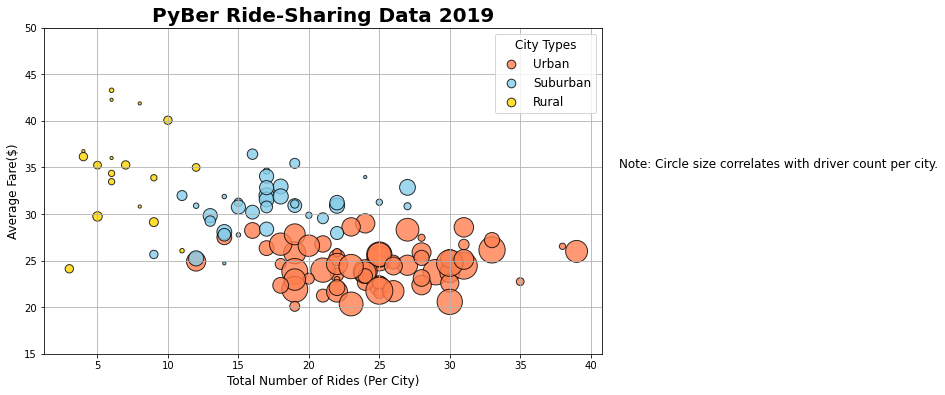

In [20]:
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='k', linewidths=1, alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c='skyblue', edgecolor='k', linewidths=1, alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor='k', linewidths=1, alpha=0.8, label="Rural")
plt.grid(True)
plt.ylim(15, 50)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare($)", fontsize=12)
plt.title("PyBer Ride-Sharing Data 2019", fontsize=20, fontweight="bold")

# Create a legend

lgnd = plt.legend(fontsize="12", mode="Expanded",
                  
                 scatterpoints=1, loc="best", title="City Types")

lgnd.legendHandles[0]._sizes = [75]

lgnd.legendHandles[1]._sizes = [75]

lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure

plt.savefig("analysis/Fig1.png")

plt.show()

In [25]:
# Get summary statistics

urban_cities_df.describe()

# suburban_cities_df.describe()

# rural_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [30]:
# Get the summary statistics for ride count

urban_ride_count.describe()

# suburban_ride_count.describe()

# rural_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [34]:
# Calculate the mean of the ride count for each city type

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
# Calculate the mode of the ride count for the urban cities.

suburban_ride_count.mode()

0    17
dtype: int64

In [37]:
# Import NumPy and the stats module from SciPy

import numpy as np

import scipy.stats as sts

In [43]:
# Calculate the measures of central tendency for the ride count for the urban cities.

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")


median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")


mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [49]:
# Get the fares for the urban cities.

urban_fares = urban_cities_df["fare"]

suburban_fares = suburban_cities_df["fare"]

rural_fares = rural_cities_df["fare"]


urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [52]:
# Calculate the measures of central tendency for the average fare for the urban cittties.

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for the urban trips is ${mean_urban_fares:.2f}.")


median_urban_fares = np.median(urban_fares)
print(f"The median fare price for the urban trips is ${median_urban_fares:.2f}.")


mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for the urban trips is {mode_urban_fares}.")

The mean fare price for the urban trips is $24.53.
The median fare price for the urban trips is $24.64.
The mode fare price for the urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [54]:
# Get the driver count data

urban_drivers = urban_cities_df['driver_count']

suburban_drivers = suburban_cities_df['driver_count']

rural_drivers = rural_cities_df['driver_count']

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [58]:
# Calculate the measures of central tendency for number of drivers

# Urban:

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for the urban trips is {mean_urban_drivers:.0f}.")


median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for the urban trips is {median_urban_drivers:.0f}.")


mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode of drivers for the urban trips is {mode_urban_drivers}.")


# Suburban:

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for the suburban trips is {mean_suburban_drivers:.0f}.")


median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for the suburban trips is {median_suburban_drivers:.0f}.")


mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode of drivers for the suburban trips is {mode_suburban_drivers}.")


# Rural:

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for the rural trips is {mean_rural_drivers:.0f}.")


median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for the rural trips is {median_rural_drivers:.0f}.")


mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode of drivers for the rural trips is {mode_rural_drivers}.")

The mean number of drivers for the urban trips is 37.
The median number of drivers for the urban trips is 37.
The mode of drivers for the urban trips is ModeResult(mode=array([39]), count=array([86])).
The mean number of drivers for the suburban trips is 14.
The median number of drivers for the suburban trips is 16.
The mode of drivers for the suburban trips is ModeResult(mode=array([20]), count=array([79])).
The mean number of drivers for the rural trips is 4.
The median number of drivers for the rural trips is 4.
The mode of drivers for the rural trips is ModeResult(mode=array([1]), count=array([32])).


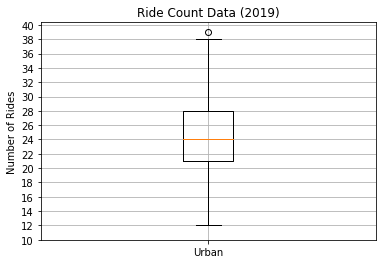

In [64]:
# Creat a box-and-whisker plot for the urban cities ride count.

x_labels = ["Urban"]

plt.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y_axis label and grid

plt.title('Ride Count Data (2019)')

plt.ylabel('Number of Rides')

plt.yticks(np.arange(10, 41, step=2.0))

plt.grid()

plt.show()

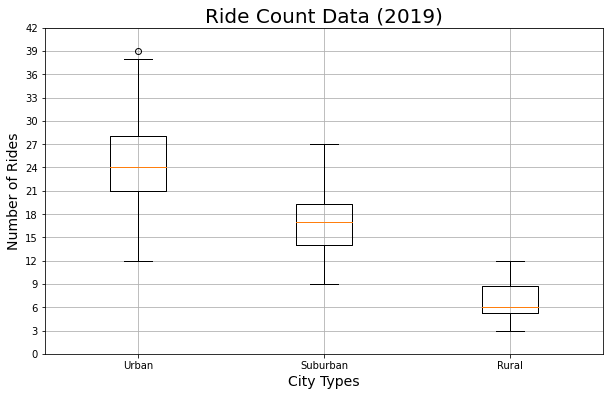

In [69]:
# Add all the ride count box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban", "Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

plt.subplots(figsize=(10, 6))

plt.title('Ride Count Data (2019)',fontsize=20)

plt.ylabel('Number of Rides',fontsize=14)

plt.xlabel('City Types',fontsize=14)

plt.boxplot(ride_count_data, labels=x_labels)

plt.yticks(np.arange(0, 45, step=3.0))

plt.grid()

# Save the figure.

plt.savefig("analysis/Fig2.png")

plt.show()

In [70]:
# Get the city that matches 39.

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


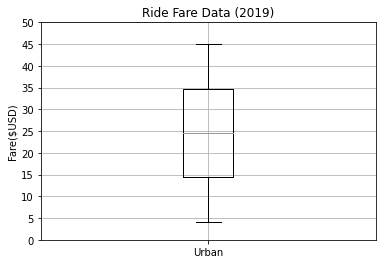

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [71]:
# Create a box-and-whisker plot for the urban fare data. (Using Object-Oriented approach)

x_labels = ["Urban"]

fig, ax = plt.subplots()

ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Fare Data (2019)')

ax.set_ylabel('Fare($USD)')

ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

urban_fares.describe()

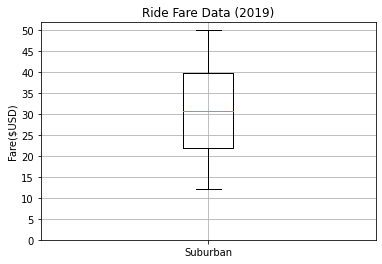

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [72]:
# Create a box-and-whisker plot for the suburban fare data. (Using Object-Oriented approach)

x_labels = ["Suburban"]

fig, ax = plt.subplots()

ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Fare Data (2019)')

ax.set_ylabel('Fare($USD)')

ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

suburban_fares.describe()

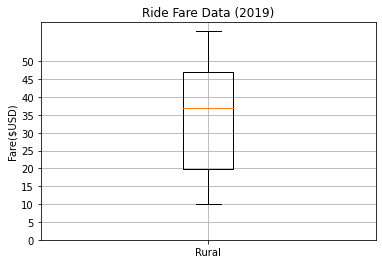

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [73]:
# Create a box-and-whisker plot for the rural fare data. 

x_labels = ["Rural"]

plt.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.

plt.title('Ride Fare Data (2019)')

plt.ylabel('Fare($USD)')

plt.yticks(np.arange(0, 51, step=5.0))

plt.grid()

plt.show()

print("Summary Statistics")

rural_fares.describe()

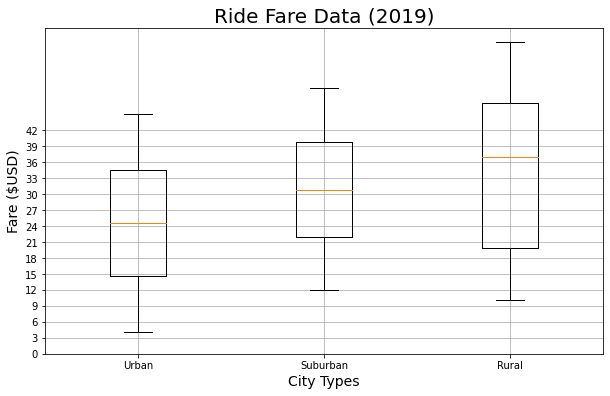

In [75]:
# Add all the fare data box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban", "Rural"]

ride_fare_data = [urban_fares, suburban_fares, rural_fares]

plt.subplots(figsize=(10, 6))

plt.title('Ride Fare Data (2019)',fontsize=20)

plt.ylabel('Fare ($USD)',fontsize=14)

plt.xlabel('City Types',fontsize=14)

plt.boxplot(ride_fare_data, labels=x_labels)

plt.yticks(np.arange(0, 45, step=3.0))

plt.grid()

# Save the figure.

plt.savefig("analysis/Fig3.png")

plt.show()

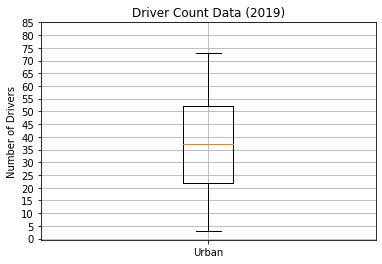

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [76]:
# Create box-and-whisker plot for urban driver count data

x_labels = ["Urban"]

plt.boxplot(urban_drivers, labels=x_labels)

# Add title, y-axis label, and grid.

plt.title('Driver Count Data (2019)')

plt.ylabel('Number of Drivers')

plt.yticks(np.arange(0, 90, step=5.0))

plt.grid()

plt.show()

print("Summary Statistics")

urban_drivers.describe()

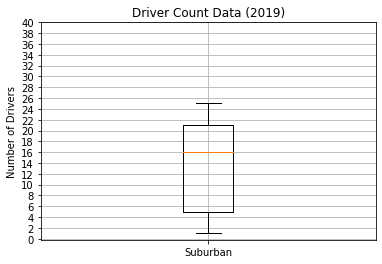

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [80]:
# Create box-and-whisker plot for suburban driver count data

x_labels = ["Suburban"]

plt.boxplot(suburban_drivers, labels=x_labels)

# Add title, y-axis label, and grid.

plt.title('Driver Count Data (2019)')

plt.ylabel('Number of Drivers')

plt.yticks(np.arange(0, 42, step=2.0))

plt.grid()

plt.show()

print("Summary Statistics")

suburban_drivers.describe()

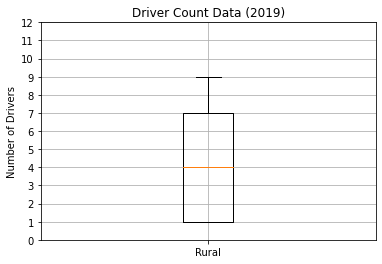

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [85]:
# Create box-and-whisker plot for rural driver count data

x_labels = ["Rural"]

plt.boxplot(rural_drivers, labels=x_labels)

# Add title, y-axis label, and grid.

plt.title('Driver Count Data (2019)')

plt.ylabel('Number of Drivers')

plt.yticks(np.arange(0, 13, step=1.0))

plt.grid()

plt.show()

print("Summary Statistics")

rural_drivers.describe()

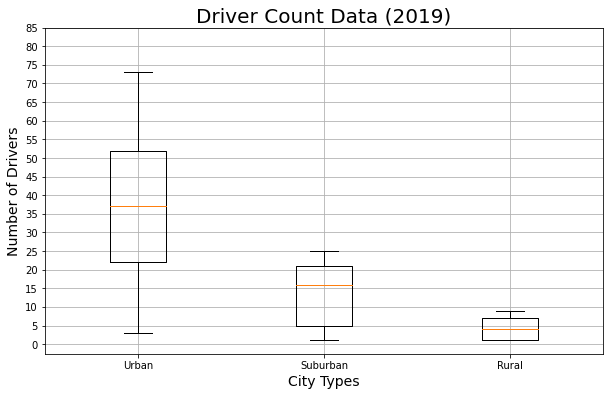

In [89]:
# Create box-and-whisker plot for all driver count data

x_labels = ["Urban", "Suburban", "Rural"]

ride_drivers_count = [urban_drivers, suburban_drivers, rural_drivers]

plt.subplots(figsize=(10, 6))

plt.boxplot(ride_drivers_count, labels=x_labels)

# Add title, y-axis label, and grid.

plt.title('Driver Count Data (2019)',fontsize=20)

plt.ylabel('Number of Drivers',fontsize=14)

plt.xlabel('City Types',fontsize=14)

plt.yticks(np.arange(0, 90, step=5.0))

plt.grid()

# Save the figure.

plt.savefig("analysis/Fig3.png")

plt.show()

In [91]:
# Get the sum of the fares for each city type.

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [93]:
# Get the sum of all the fares.

total_fares = pyber_data_df["fare"].sum()

total_fares

63538.64

In [94]:
# Calculate the percentage of fare for each city type.

type_percents = sum_fares_by_type/total_fares * 100

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [95]:
# Calculate the percentage of fare for each city type.

type_percents = pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum() * 100

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

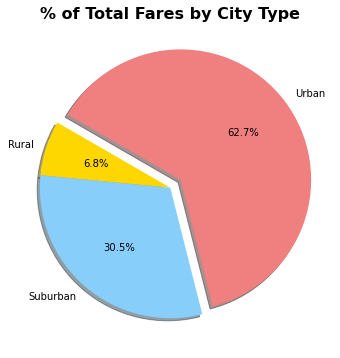

In [101]:
# Build the percentage of fares by city type pie chart

import matplotlib as mpl

# Build Pie Chart

plt.subplots(figsize=(10, 6))

plt.pie(type_percents, 
        
        labels=["Rural", "Suburban", "Urban"],
       
        colors=["gold", "lightskyblue", "lightcoral"],
        
        explode=[0, 0, 0.1],
        
        autopct='%1.1f%%',
       
        shadow=True,
       
        startangle=150)

plt.title("% of Total Fares by City Type",fontsize=16,fontweight="bold")

# Change the default font size from 10 to 14

mpl.rcParams['fontsize'] = 14

# Save Figure

# Show Figure

plt.show()